In [29]:
import matplotlib.pyplot as plt

# csv file review

In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('mobilesurface_1205949.csv')
df[df['salinity'] > 29.6]

,Unnamed: 0,timeseries_id,Conductivity,depth,Temperature,latitude,time,longitude,salinity
2033,2033,mobilesurface_1205949,3.64228,3.0,14.2231,49.196055,2019-11-15T21:07:26.712Z,-123.955511,29.7394
19682,19682,mobilesurface_1205949,3.67844,3.0,13.3836,49.195880,2019-11-16T02:01:47.530Z,-123.955385,30.7323
19683,19683,mobilesurface_1205949,3.73219,3.0,15.2015,49.195914,2019-11-16T02:01:48.532Z,-123.955383,29.7979
34651,34651,mobilesurface_1205949,3.70746,3.0,12.4915,49.195990,2019-11-16T06:11:16.545Z,-123.955368,31.7412
34655,34655,mobilesurface_1205949,3.68557,3.0,14.6182,49.196146,2019-11-16T06:11:20.547Z,-123.955358,29.8266
34656,34656,mobilesurface_1205949,3.77290,3.0,15.6679,49.196186,2019-11-16T06:11:21.547Z,-123.955356,29.8042
34659,34659,mobilesurface_1205949,3.83693,3.0,16.4791,49.196309,2019-11-16T06:11:24.545Z,-123.955349,29.7540
34661,34661,mobilesurface_1205949,3.83191,3.0,16.5876,49.196393,2019-11-16T06:11:26.546Z,-123.955346,29.6303


<Axes: xlabel='time'>

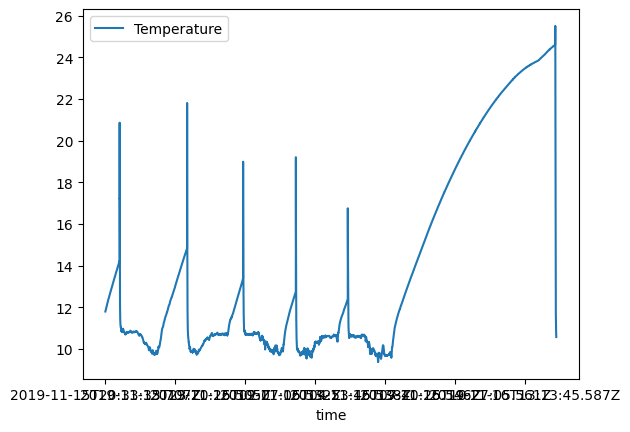

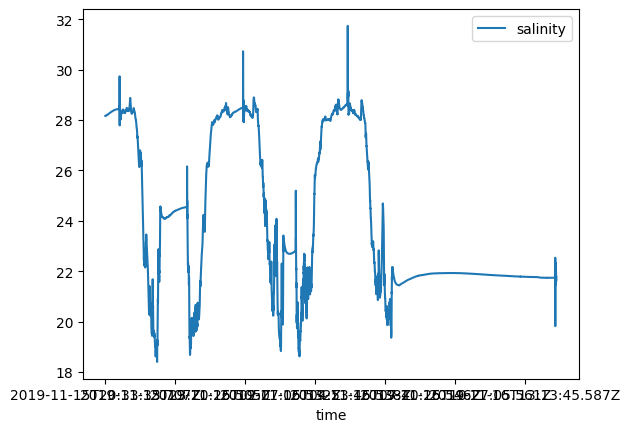

In [4]:
# plotting

df.plot(x='time', y='Temperature', kind='line')
df.plot(x='time', y='salinity', kind='line')

# solving a linear system

**solve the system with matrix in: `system_of_linear_equations.csv`**

$$ Ax = b $$

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('system_of_linear_equations.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9
0,3,0,1,3,0,1,1,4,5,5
1,1,0,0,0,-1,0,1,2,3,5
2,0,-1,7,3,1,1,1,1,0,3
3,1,0,0,3,1,1,1,0,4,2
4,0,-1,0,3,1,1,7,3,5,0
5,2,5,2,3,1,1,7,3,12,3
6,3,6,7,3,1,1,1,0,0,2
7,-3,5,0,3,1,1,5,2,1,-2
8,3,1,1,3,1,1,4,5,3,-10


In [20]:
A = data.to_numpy()[:,:-1]
b = data.to_numpy()[:,-1]

x = np.linalg.solve(A, b)

In [21]:
A@x - b

array([ -1.73571783,   4.69945355,  -1.19970194,  -4.3407849 ,
       -11.36761053,  -5.46895181,   0.57426726, -25.68653751,
        -3.60009935])

In [22]:
import numpy as np
with open('system_of_linear_equations.csv', 'r') as f:
    system = np.array(list(map(lambda x: x.split(','), f.read().split('\n'))))

system = system.astype(int)

system

array([[  3,   0,   1,   3,   0,   1,   1,   4,   5,   5],
       [  1,   0,   0,   0,  -1,   0,   1,   2,   3,   5],
       [  0,  -1,   7,   3,   1,   1,   1,   1,   0,   3],
       [  1,   0,   0,   3,   1,   1,   1,   0,   4,   2],
       [  0,  -1,   0,   3,   1,   1,   7,   3,   5,   0],
       [  2,   5,   2,   3,   1,   1,   7,   3,  12,   3],
       [  3,   6,   7,   3,   1,   1,   1,   0,   0,   2],
       [ -3,   5,   0,   3,   1,   1,   5,   2,   1,  -2],
       [  3,   1,   1,   3,   1,   1,   4,   5,   3, -10]])

In [23]:
LHS = system[:, :-1]
RHS = system[:, -1]

x = np.linalg.solve(LHS, RHS)

In [25]:
A@x - RHS

array([ -1.73571783,   4.69945355,  -1.19970194,  -4.3407849 ,
       -11.36761053,  -5.46895181,   0.57426726, -25.68653751,
        -3.60009935])

In [26]:
np.matmul(LHS,x), RHS

(array([  3.26428217,   9.69945355,   1.80029806,  -2.3407849 ,
        -11.36761053,  -2.46895181,   2.57426726, -27.68653751,
        -13.60009935]),
 array([  5,   5,   3,   2,   0,   3,   2,  -2, -10]))

In [27]:
np.linalg.cond(LHS), np.linalg.cond(A)

(1.3841790660399318e+17, 1.3841790660399318e+17)

always check your answer, and use `np.linalg.solve(A, b)` to solve the matrix equation $Ax=b$.

# Simulation of random events

In [46]:
from numpy.random import binomial as B

In [48]:
# 50/50 coin flip one hundred times, aka binomial distribution with n=100, p=0.5, aka 100 bernoulli trials with p=0.5

B(1, 0.5, 100)

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

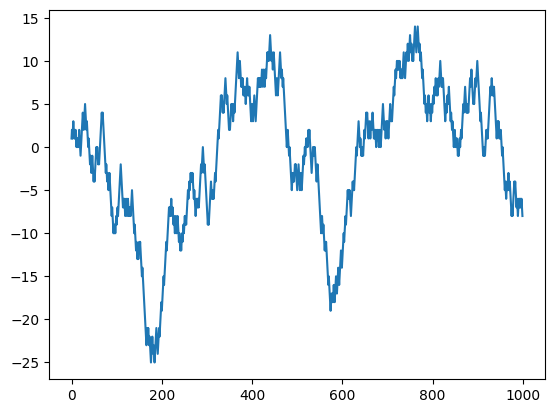

In [62]:
rw = np.cumsum(B(1, 0.5, 1000)* 2 - 1)
plt.plot(rw)

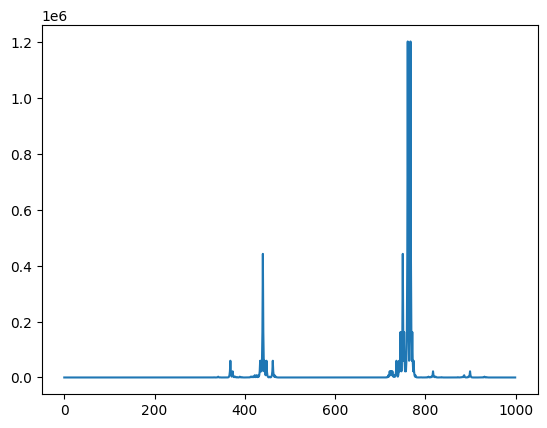

In [63]:
plt.plot(np.exp(rw))

In [49]:
from numpy.random import normal as N

N(0, 1, 100)

array([ 6.08690435e-01, -1.21841420e+00, -4.64986249e-01,  6.80164643e-01,
        4.90571434e-01,  1.32285996e+00,  4.17807272e-01,  1.57854980e+00,
       -3.87700654e-01, -1.25679895e+00,  2.80438742e-01,  7.37748040e-01,
       -4.51180524e-01, -9.42795324e-01, -1.59444750e-01, -8.77517425e-01,
        1.05907369e+00, -1.21610258e+00,  4.91640565e-01, -1.65837069e-01,
       -6.16846202e-02, -3.38115081e-01, -6.86408922e-01, -3.00899394e-01,
       -1.17256017e+00,  6.27886478e-01, -1.62826025e+00, -4.88803038e-01,
       -1.09239584e+00,  7.17570765e-01, -8.69719573e-02,  5.76752355e-01,
        4.82503373e-01,  5.00754234e-01,  7.13251129e-01,  1.54158934e+00,
       -2.87901379e+00, -6.82676707e-01, -3.63372705e-01, -4.68137602e-01,
        1.75774802e+00, -4.83132182e-02, -5.08264359e-01,  2.22098766e+00,
       -4.45489353e-01,  1.32667059e+00, -6.00149283e-01, -1.39050029e-03,
        1.43797723e+00,  1.29142739e-01, -8.76950229e-02,  9.30919431e-01,
       -1.34980548e+00,  

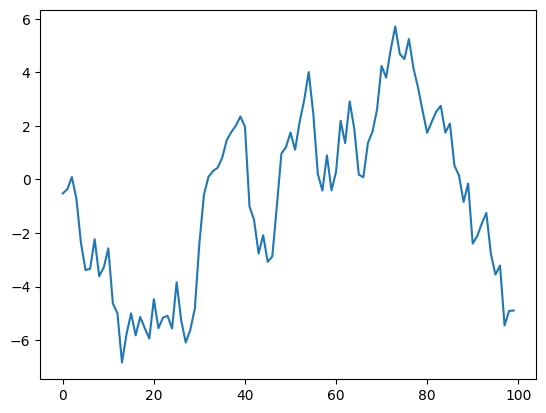

In [51]:
rm = np.cumsum(N(0, 1, 100))
plt.plot(rm)

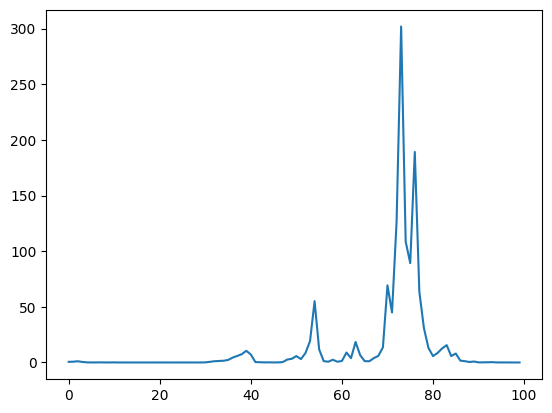

In [53]:
plt.plot(np.exp(rm))

# symbolic calculation

**examples:**
1. polar coordinates
2. spherical coordinates
3. derivative (critical / inflection points, how to check your answer?)
4. integration
5. integration and derivative
6. integration and derivative, and fsolve
7. Equilibrium points
8. finding moments


In [1]:
from sympy import *
from sympy.abc import x, y, z, rho, phi, theta, r, t

let's get a symbolic expression for the roots of $\cos x$ ($n\pi$)

In [5]:
y = sin(x)
solve(y, x)

[0, pi]

In [10]:
y = sin(x)
solveset(y, x) # not sure about the union, but OK.. sure

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

In [14]:
# polar coordinates

x = r*cos(theta)
y = r*sin(theta)

D = Matrix([x, y]).jacobian([r, theta])

display(D, simplify(D.det()))

Matrix([
[cos(theta), -r*sin(theta)],
[sin(theta),  r*cos(theta)]])

r

In [16]:
# spherical coordinates

x = rho*sin(phi)*cos(theta)
y = rho*sin(phi)*sin(theta)
z = rho*cos(phi)

D = Matrix([x, y, z]).jacobian([rho, phi, theta])

display(D, simplify(D.det()))

Matrix([
[sin(phi)*cos(theta), rho*cos(phi)*cos(theta), -rho*sin(phi)*sin(theta)],
[sin(phi)*sin(theta), rho*sin(theta)*cos(phi),  rho*sin(phi)*cos(theta)],
[           cos(phi),           -rho*sin(phi),                        0]])

rho**2*sin(phi)

In [19]:
# cylindrical coordinates

x = r*cos(theta)
y = r*sin(theta)
z = z

D = Matrix([x, y, z]).jacobian([r, theta, z])

D

Matrix([
[cos(theta), -r*sin(theta), 0],
[sin(theta),  r*cos(theta), 0],
[         0,             0, 1]])

In [3]:
# derivative: critical point

f = sin(x)*cos(y)

D = Matrix([f]).jacobian([x, y])

solve(D, [x, y])

[(0, pi/2),
 (0, 3*pi/2),
 (pi/2, 0),
 (pi/2, pi),
 (pi, pi/2),
 (pi, 3*pi/2),
 (3*pi/2, 0),
 (3*pi/2, pi)]

In [6]:
for crit_pt in [(0, pi/2),(0, 3*pi/2),(pi/2, 0),(pi/2, pi),(pi, pi/2),(pi, 3*pi/2),(3*pi/2, 0),(3*pi/2, pi)]:
    print(diff(f, x).subs({x: crit_pt[0], y: crit_pt[1]}), diff(f, y).subs({x: crit_pt[0], y: crit_pt[1]}))

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [7]:
# inflection point is second derivative

In [14]:
# integration

f = x**3 - 3*x + 1

F = integrate(f, (x, 0, t)) 

display(f, F, diff(F, t))

x**3 - 3*x + 1

t**4/4 - 3*t**2/2 + t

t**3 - 3*t + 1

In [24]:
# let's integrate a random polynomial from 0 to t, and we want to know at what value t, the integral is 42069

random_polynomial = 8*x**4 + 3*x**2 - 2*x + 1
rp = lambdify(x, random_polynomial)
from scipy.optimize import fsolve
fsolve(lambda t: integrate(random_polynomial, (x, 0, t)) - 42069, 10000)

array([7.64096606])

In [26]:
# check answer

integrate(random_polynomial, (x, 0, 7.64096606))

42068.9999404337

we could have just as easily done this without sympy

In [32]:
random_polynomial = lambda x: 8*x**4 + 3*x**2 - 2*x + 1
fsolve(lambda t: quad(random_polynomial, 0, t)[0], 10000)

array([0.])

why is the above not working?

how do we know the above is not working?

# numerical integration

In [16]:
from scipy.integrate import quad, dblquad, tplquad, nquad

# system of linear odes

$$
\begin{align}
\frac{dx}{dt} &= -x + y \\
\frac{dy}{dt} &= x - y
\end{align}
$$

In [18]:
import numpy as np
from scipy.integrate import quad
def dx(x, y):
    return -x + y

def dy(x, y):
    return x - y

ts = np.linspace(0, 10, 1000)

x0 = 1
y0 = 0

xs = [x0]
ys = [y0]

for i, ti in enumerate(ts):
    if i == 0:
        continue
    dt = ts[i] - ts[i-1]
    x = xs[i-1] + dx(xs[i-1], ys[i-1])*dt
    y = ys[i-1] + dy(xs[i-1], ys[i-1])*dt
    xs.append(x)
    ys.append(y)

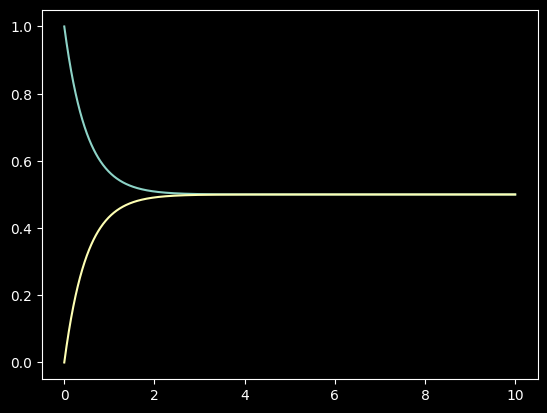

In [20]:
from matplotlib.pyplot import plot
plot(ts, xs)
plot(ts, ys)

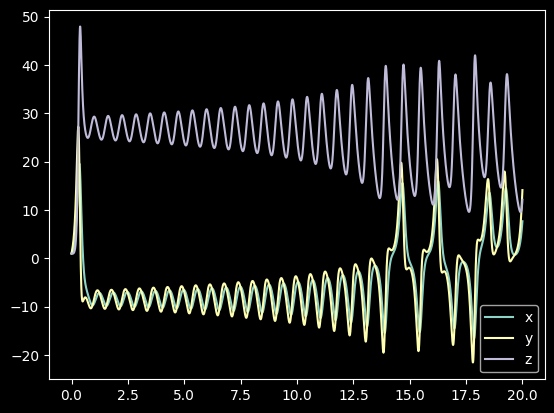

In [25]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

sigma = 10.0
rho = 28.0
beta = 8.0/3.0

def lorentz(t, X):
    x, y, z = X
    return [sigma*(y - x), x*(rho - z) - y, x*y - beta*z]

y0 = [1.0, 1.0, 1.0]

sol = solve_ivp(lorentz, [0, 20], y0, t_eval=np.linspace(0, 20, 10000))

plt.plot(sol.t, sol.y[0], label='x')
plt.plot(sol.t, sol.y[1], label='y')
plt.plot(sol.t, sol.y[2], label='z')
plt.legend()
